### This code is for the NCBI/NLM Codeathon 2024 to identify genes that are expressed in the human gut, categorize them into groups, and compare their expression between healthy and colons isolated from IBD patients

In [70]:
install.packages("openxlsx")
install.packages("gplots")
install.packages("pheatmap")


The downloaded binary packages are in
	/var/folders/42/ffd2swy95nbbxvp_cglvr6n00000gq/T//RtmpNtTy6l/downloaded_packages

The downloaded binary packages are in
	/var/folders/42/ffd2swy95nbbxvp_cglvr6n00000gq/T//RtmpNtTy6l/downloaded_packages


also installing the dependencies ‘colorspace’, ‘farver’, ‘labeling’, ‘munsell’, ‘viridisLite’, ‘RColorBrewer’, ‘scales’, ‘gtable’





The downloaded binary packages are in
	/var/folders/42/ffd2swy95nbbxvp_cglvr6n00000gq/T//RtmpNtTy6l/downloaded_packages


Corrected the spreadsheet due to the excel conversion of gene names on lines 8833 - 8845:

* 1-MAR -> MTARC1
* 2-MAR -> MTARC2
* 1-MAR -> MARCHF1
* 10-MAR -> MARCHF10
* 11-MAR -> MARCHF11
* 2-MAR -> MARCHF2
* 3-MAR -> MARCHF3
* 4-MAR -> MARCHF4
* 5-MAR -> MARCHF5
* 6-MAR -> MARCHF6
* 7-MAR -> MARCHF7
* 8-MAR -> MARCHF8
* 9-MAR -> MARCHF9

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9325790/

In [171]:
library(openxlsx)

file_path <- "../data/Priya_et_al_Supplementary_Tables/Supplementary Tables S12-S17.xlsx"

# getting data from sheets
sheets <- openxlsx::getSheetNames(file_path)
print(sheets)

data_frame <- lapply(sheets, openxlsx::read.xlsx, xlsxFile=file_path)
# assign names to data frame
names(data_frame) <- sheets

[1] "S12" "S13" "S14" "S15" "S16" "S17"


In [2]:
library(Matrix)

In [172]:
##Load gene expression matrix across patients
df <- data_frame$S14
head(df)

,X1,C3002,C3003,C3004,C3005,C3006,C3011,C3015,C3016,C3017,⋯,P6009,P6012,P6013,P6014,P6016,P6017,P6018,P6024,P6025,P6028
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A1BG,1,1,0,0,4,5,3,1,0,⋯,6,5,0,2,1,3,1,3,4,0
2,A1CF,2225,5636,2777,2662,1461,696,1842,557,4509,⋯,1558,1972,2127,10929,5952,2948,2350,2239,3975,3359
3,A2M,8957,24572,75820,4988,43441,65878,27366,44210,18346,⋯,31922,87544,36194,12458,36712,23725,22523,40459,24306,5985
4,A2ML1,0,0,0,0,0,1,0,2,2,⋯,1,0,1,1,1,0,1,1,0,0
5,A3GALT2,0,1,1,0,1,0,1,1,1,⋯,0,3,0,0,1,0,0,0,0,0
6,A4GALT,31,56,271,34,490,321,394,1132,128,⋯,277,451,259,88,116,154,174,287,65,58


In [173]:
genes.list <- df$X1
rownames(df) <- genes.list
head(df)

,X1,C3002,C3003,C3004,C3005,C3006,C3011,C3015,C3016,C3017,⋯,P6009,P6012,P6013,P6014,P6016,P6017,P6018,P6024,P6025,P6028
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,A1BG,1,1,0,0,4,5,3,1,0,⋯,6,5,0,2,1,3,1,3,4,0
A1CF,A1CF,2225,5636,2777,2662,1461,696,1842,557,4509,⋯,1558,1972,2127,10929,5952,2948,2350,2239,3975,3359
A2M,A2M,8957,24572,75820,4988,43441,65878,27366,44210,18346,⋯,31922,87544,36194,12458,36712,23725,22523,40459,24306,5985
A2ML1,A2ML1,0,0,0,0,0,1,0,2,2,⋯,1,0,1,1,1,0,1,1,0,0
A3GALT2,A3GALT2,0,1,1,0,1,0,1,1,1,⋯,0,3,0,0,1,0,0,0,0,0
A4GALT,A4GALT,31,56,271,34,490,321,394,1132,128,⋯,277,451,259,88,116,154,174,287,65,58


In [174]:
write.csv(df, "../data/human_gene_exp_IBD.csv")

In [175]:
df <- df[, -(1:1)]
head(df)

,C3002,C3003,C3004,C3005,C3006,C3011,C3015,C3016,C3017,C3021,⋯,P6009,P6012,P6013,P6014,P6016,P6017,P6018,P6024,P6025,P6028
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,1,1,0,0,4,5,3,1,0,2,⋯,6,5,0,2,1,3,1,3,4,0
A1CF,2225,5636,2777,2662,1461,696,1842,557,4509,1354,⋯,1558,1972,2127,10929,5952,2948,2350,2239,3975,3359
A2M,8957,24572,75820,4988,43441,65878,27366,44210,18346,58609,⋯,31922,87544,36194,12458,36712,23725,22523,40459,24306,5985
A2ML1,0,0,0,0,0,1,0,2,2,0,⋯,1,0,1,1,1,0,1,1,0,0
A3GALT2,0,1,1,0,1,0,1,1,1,1,⋯,0,3,0,0,1,0,0,0,0,0
A4GALT,31,56,271,34,490,321,394,1132,128,560,⋯,277,451,259,88,116,154,174,287,65,58


In [176]:
##Load the metadata
meta <- read.csv("../data/human_IBD_patient_metadata.csv")

In [177]:
##Now change the column names of the dataframe from patient IDs to IBD vs nonIBD
new_column_names <- sapply(colnames(df), function (id){
  col_ids <- meta[which(meta$Participant_ID == id), "Diagnosis"]
  return(col_ids)
})
# new_column_names

In [178]:
##Convert the list to a character vector
new_column_names <- unlist(new_column_names)

#Replace column names of dataframe
colnames(df) <- new_column_names

In [179]:
head(df)

,CD,UC,UC.1,UC.2,UC.3,UC.4,UC.5,CD.1,CD.2,CD.3,⋯,CD,UC,UC.1,nonIBD,CD.1,nonIBD.1,nonIBD.2,CD.2,UC.2,CD.3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,1,1,0,0,4,5,3,1,0,2,⋯,6,5,0,2,1,3,1,3,4,0
A1CF,2225,5636,2777,2662,1461,696,1842,557,4509,1354,⋯,1558,1972,2127,10929,5952,2948,2350,2239,3975,3359
A2M,8957,24572,75820,4988,43441,65878,27366,44210,18346,58609,⋯,31922,87544,36194,12458,36712,23725,22523,40459,24306,5985
A2ML1,0,0,0,0,0,1,0,2,2,0,⋯,1,0,1,1,1,0,1,1,0,0
A3GALT2,0,1,1,0,1,0,1,1,1,1,⋯,0,3,0,0,1,0,0,0,0,0
A4GALT,31,56,271,34,490,321,394,1132,128,560,⋯,277,451,259,88,116,154,174,287,65,58


In [180]:
##Save new dataframe
write.csv(df, "../data/human_gene_exp_IBD_new.csv")

In [181]:
##Calculate mean expression for the 3 categories
##Isolate the three datasets to calculate the mean expression for each category
df.cd <- df[, which(colnames(df) == "CD")]
df.uc <- df[, which(colnames(df) == "UC")]
df.nonibd <- df[, which(colnames(df) == "nonIBD")]

In [182]:
head(df.cd)

,CD,CD.1,CD.2,CD.3,CD.4,CD.5,CD.6,CD.7,CD.8,CD.9,⋯,CD.24,CD.25,CD.26,CD.27,CD.28,CD.29,CD.30,CD.31,CD.32,CD.33
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,1,1,0,2,2,2,0,1,1,4,⋯,0,0,0,4,3,1,6,1,3,0
A1CF,2225,557,4509,1354,2435,1938,1574,3072,3059,302,⋯,3894,4305,1112,3065,2590,2633,1558,5952,2239,3359
A2M,8957,44210,18346,58609,32286,21338,26940,33594,28439,37918,⋯,25323,41981,13186,27552,20895,10474,31922,36712,40459,5985
A2ML1,0,2,2,0,1,0,0,0,0,1,⋯,0,1,0,1,0,0,1,1,1,0
A3GALT2,0,1,1,1,2,1,0,0,1,0,⋯,0,0,0,1,0,0,0,1,0,0
A4GALT,31,1132,128,560,127,121,211,256,64,735,⋯,125,173,126,149,150,73,277,116,287,58


In [168]:
head(df.uc)

,UC,UC.1,UC.2,UC.3,UC.4,UC.5,UC.6,UC.7,UC.8,UC.9,⋯,UC.12,UC.13,UC.14,UC.15,UC.16,UC.17,UC.18,UC.19,UC.20,UC.21
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,1,1,0,0,4,5,2,1,0,1,⋯,0,0,1,1,0,3,3,6,5,3
A1CF,2225,5636,2777,2662,1461,696,1938,3072,2241,3059,⋯,3476,5141,2894,2351,3894,3911,2590,1558,1972,2239
A2M,8957,24572,75820,4988,43441,65878,21338,33594,26769,28439,⋯,7533,5654,15979,27285,25323,18457,20895,31922,87544,40459
A2ML1,0,0,0,0,0,1,0,0,0,0,⋯,2,2,1,0,0,0,0,1,0,1
A3GALT2,0,1,1,0,1,0,1,0,0,1,⋯,0,1,1,2,0,0,0,0,3,0
A4GALT,31,56,271,34,490,321,121,256,63,64,⋯,154,32,132,116,125,149,150,277,451,287


In [169]:
head(df.nonibd)

,nonIBD,nonIBD.1,nonIBD.2,nonIBD.3,nonIBD.4,nonIBD.5,nonIBD.6,nonIBD.7,nonIBD.8,nonIBD.9,⋯,nonIBD.12,nonIBD.13,nonIBD.14,nonIBD.15,nonIBD.16,nonIBD.17,nonIBD.18,nonIBD.19,nonIBD.20,nonIBD.21
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,2,1,0,1,2,1,0,1,4,0,⋯,0,3,0,0,0,4,2,0,1,3
A1CF,1354,3462,3616,3360,4172,2341,4997,3158,3444,2730,⋯,942,3761,2219,2280,4372,496,4359,2127,5952,2948
A2M,58609,26193,21167,32729,26799,27984,5630,32295,6813,26427,⋯,37843,21473,19711,13940,26737,47488,24096,36194,36712,23725
A2ML1,0,1,1,0,0,0,0,0,0,0,⋯,0,1,0,0,0,4,1,1,1,0
A3GALT2,1,3,0,0,0,1,0,0,2,0,⋯,0,0,0,0,0,2,0,0,1,0
A4GALT,560,199,107,201,123,292,37,205,229,150,⋯,401,93,93,65,111,506,85,259,116,154


In [183]:
##Calculate mean
df.cd$mean.exp <- rowMeans(df.cd)
df.uc$mean.exp <- rowMeans(df.uc)
df.nonibd$mean.exp <- rowMeans(df.nonibd)

In [196]:
##Now cbind the mean expression columns
dx <- cbind(df.cd$mean.exp, cbind(df.uc$mean.exp, df.nonibd$mean.exp))
rownames(dx) <- rownames(df)
colnames(dx) <- c("CD", "UC", "nonIBD")

In [197]:
head(dx)

,CD,UC,nonIBD
A1BG,1.147059e+00,1.545455e+00,1.272727e+00
A1CF,3.044706e+03,2.775545e+03,3.132227e+03
A2M,2.427091e+04,3.001482e+04,2.097550e+04
A2ML1,5.588235e-01,3.636364e-01,5.909091e-01
A3GALT2,5.294118e-01,6.818182e-01,2.727273e-01
A4GALT,1.909118e+02,1.990909e+02,1.518636e+02


In [112]:
##Now use this dataframe to make dotplots for specific sets of transporter genes
##Set the genes for which I will plot dotplots
abc.transporters <- grep("ABC", rownames(df), value = T)
slc.transporters <- grep("SLC", rownames(df), value = T)
aqp.transporters <- grep("AQP", rownames(df), value = T)
cyp.genes <- grep("CYP", rownames(df), value = T)
kcn.genes <- grep("KCN", rownames(df), value = T)
trpv.genes <- grep("TRPV", rownames(df), value = T)

In [122]:
get_gene_expression_data <- function(data, genes){
    t(data[genes,])
}

In [123]:
abc.gene_expression_data <- get_gene_expression_data(dx, abc.transporters)
slc.gene_expression_data <- get_gene_expression_data(dx, slc.transporters)
aqp.gene_expression_data <- get_gene_expression_data(dx, aqp.transporters)
cyp.gene_expression_data <- get_gene_expression_data(dx, cyp.genes)
kcn.gene_expression_data <- get_gene_expression_data(dx, kcn.genes)
trpv.gene_expression_data <- get_gene_expression_data(dx, trpv.genes)

In [135]:
# Plot the heatmap
library(gplots)

draw_heatmap <- function(data, gene_name) {
#     output_pdf = paste("../data/plots/", gene_name, ".pdf")
#     pdf(output_pdf, width = 24, height = 24)
#     pdf("../data/plots/TRPV_channels_transporter_heatmap.pdf", width = 24, height = 24)
    
    title = paste("Gene Expression Heatmap", "-", gene_name)
    heatmap.2(as.matrix(data),
          dendrogram = "none",      # Add dendrogram for rows
          trace = "none",          # Remove trace
          margins = c(10,10),      # Add margins
          col = hcl.colors(256, palette = "viridis"),  # Color scheme
          main = title,
          xlab = "Genes",
          ylab = "Conditions")    
#     dev.off()
}

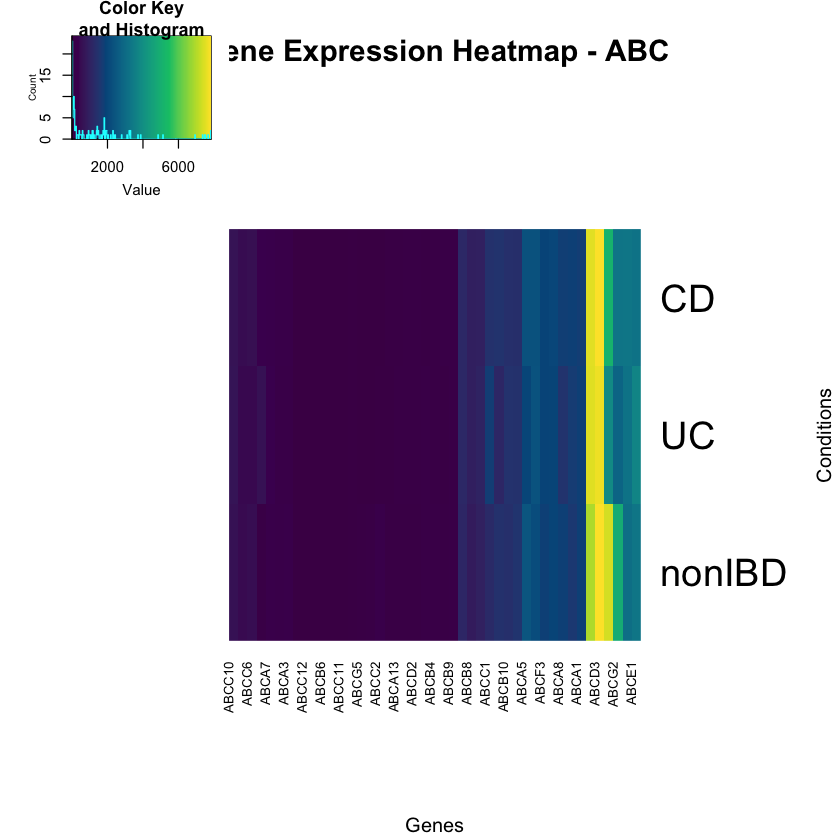

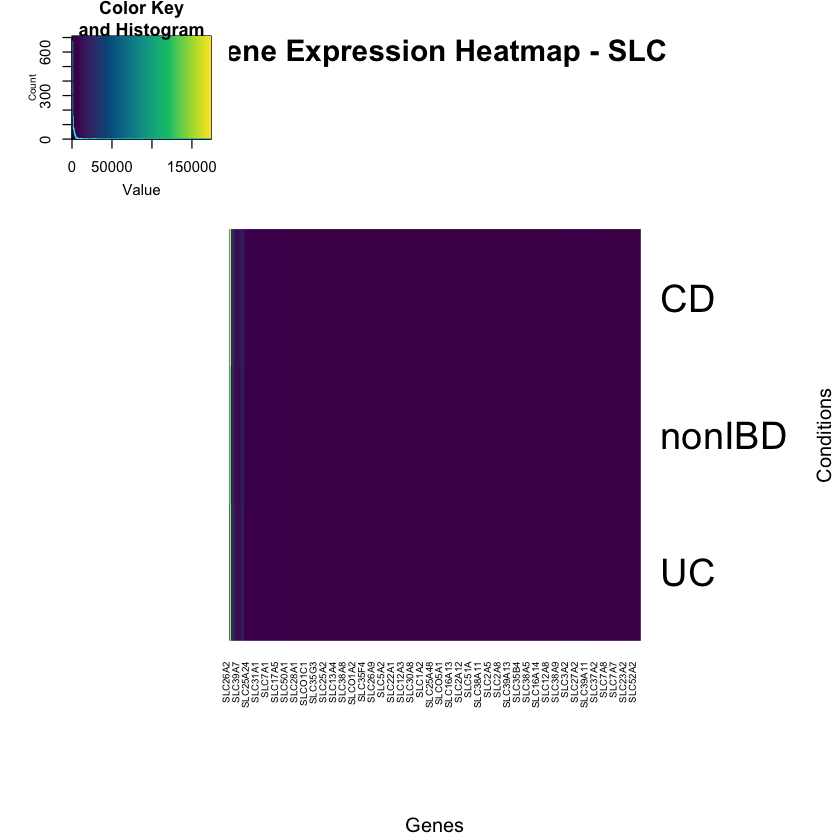

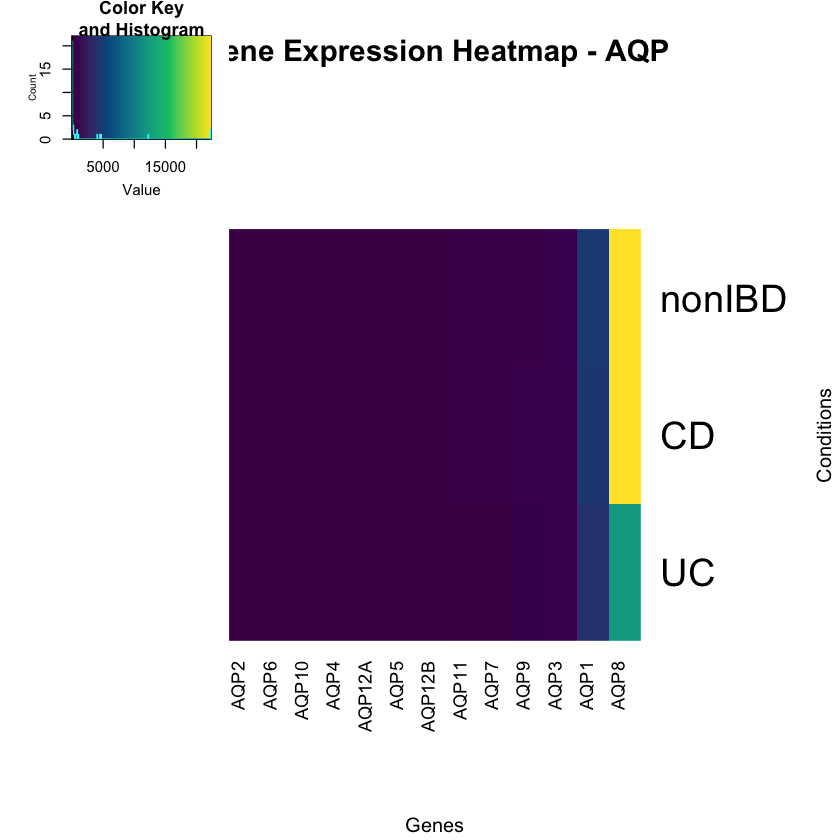

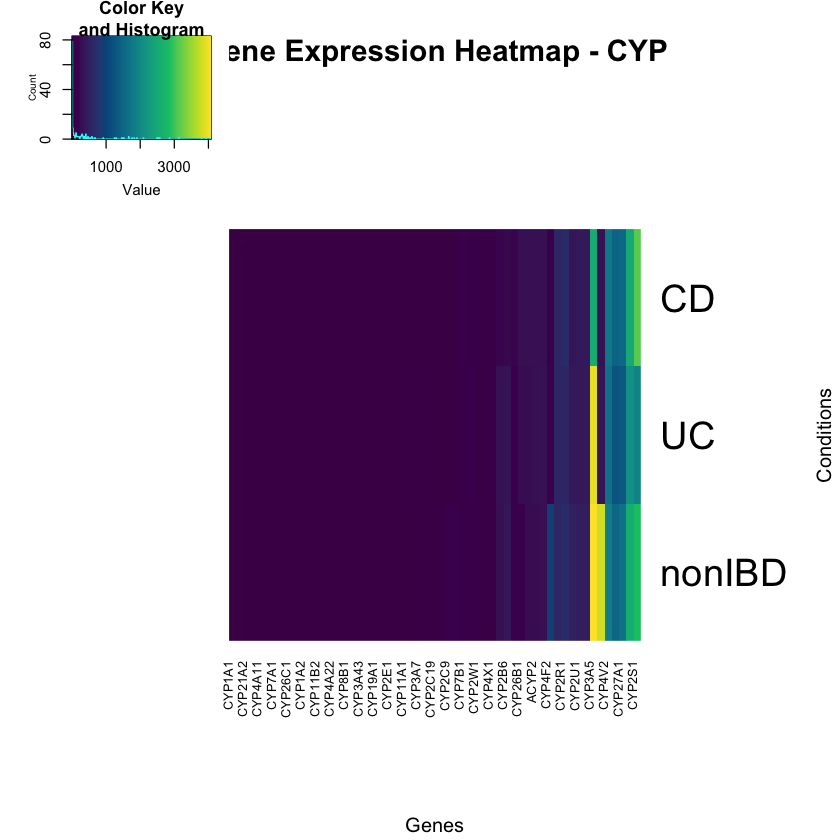

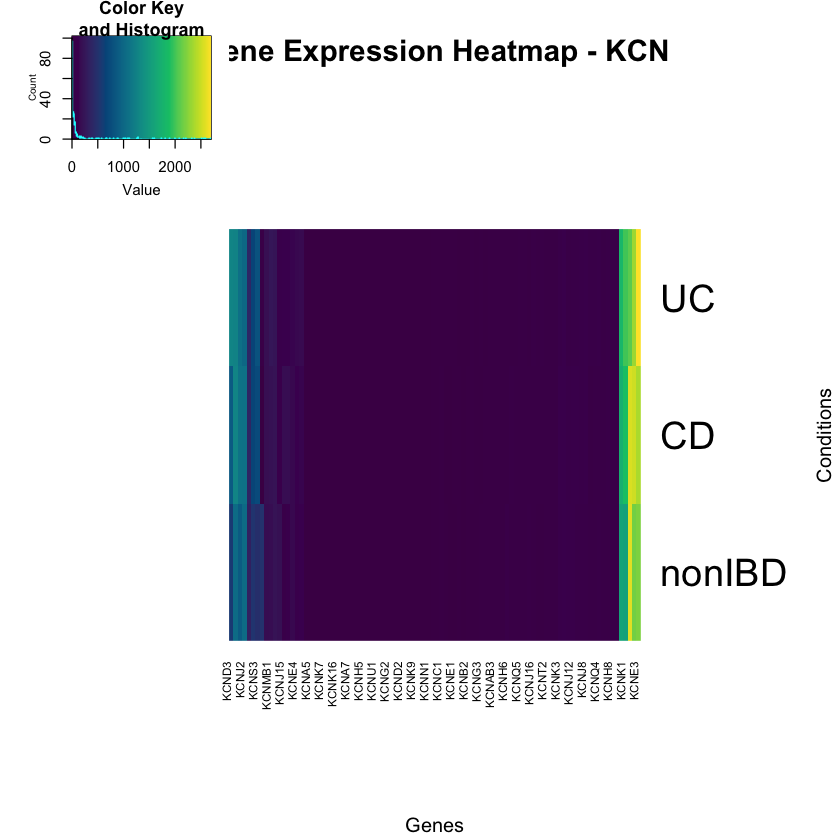

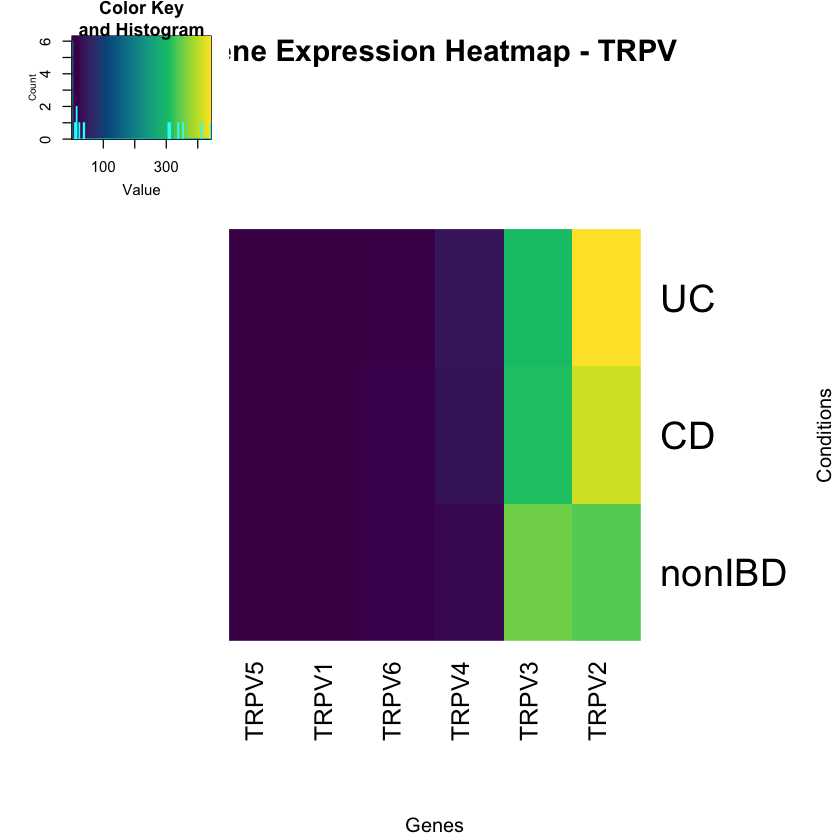

In [134]:
draw_heatmap(abc.gene_expression_data, "ABC")
draw_heatmap(slc.gene_expression_data, "SLC")
draw_heatmap(aqp.gene_expression_data, "AQP")
draw_heatmap(cyp.gene_expression_data, "CYP")
draw_heatmap(kcn.gene_expression_data, "KCN")
draw_heatmap(trpv.gene_expression_data, "TRPV")

In [142]:
library(pheatmap)
draw_pheatmap <- function(data, gene_name) {
#     output_pdf = paste("../data/plots/pheatmap-", gene_name, ".pdf")
#     pdf(output_pdf, width = 24, height = 24)
    
    title = paste("Gene Expression Heatmap", "-", gene_name)
    pheatmap(
        main = title,
        as.matrix(data), 
        color = , cluster_rows = F, 
        cluster_cols = F
    )
    #     dev.off()
}

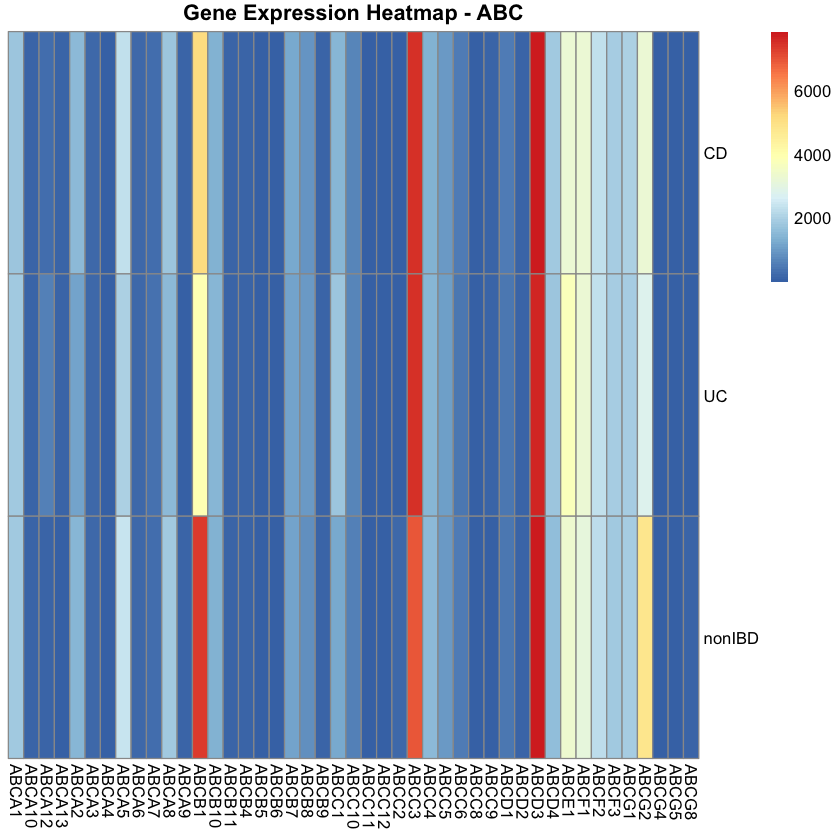

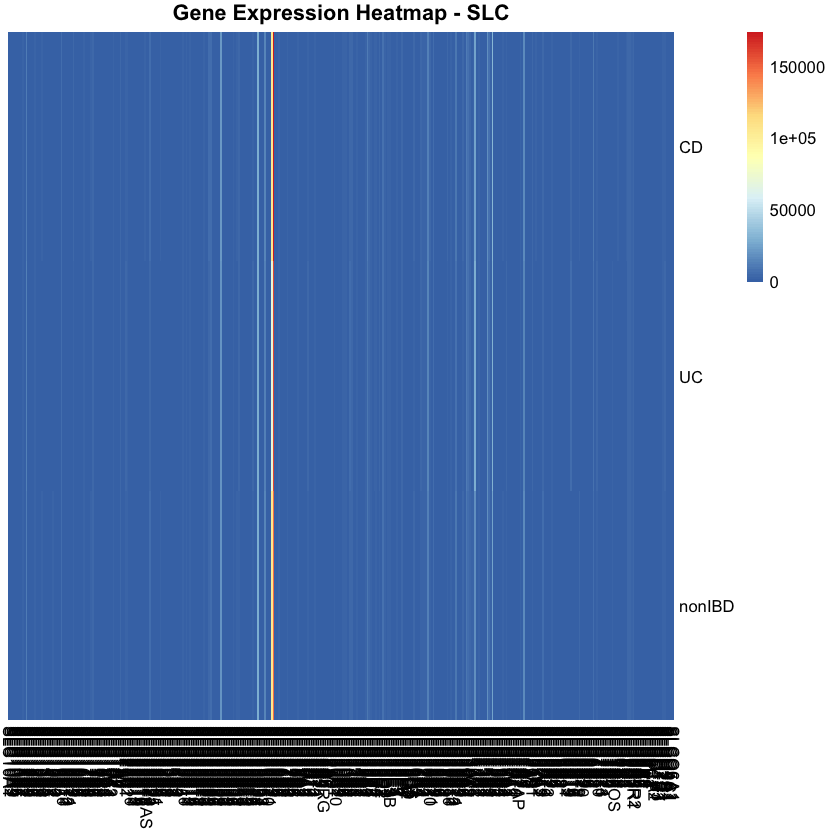

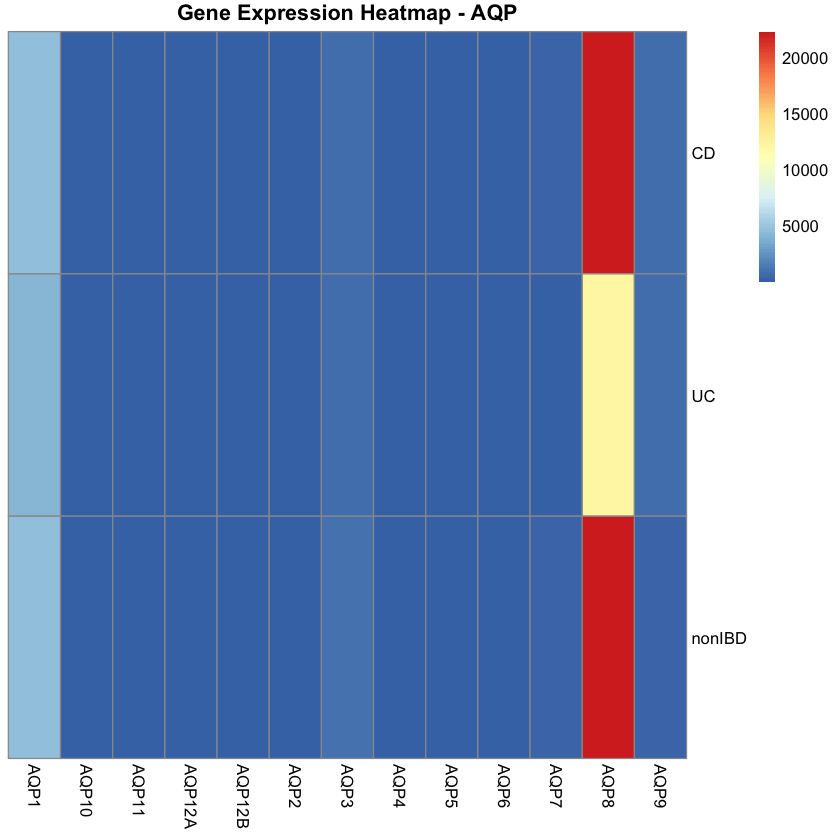

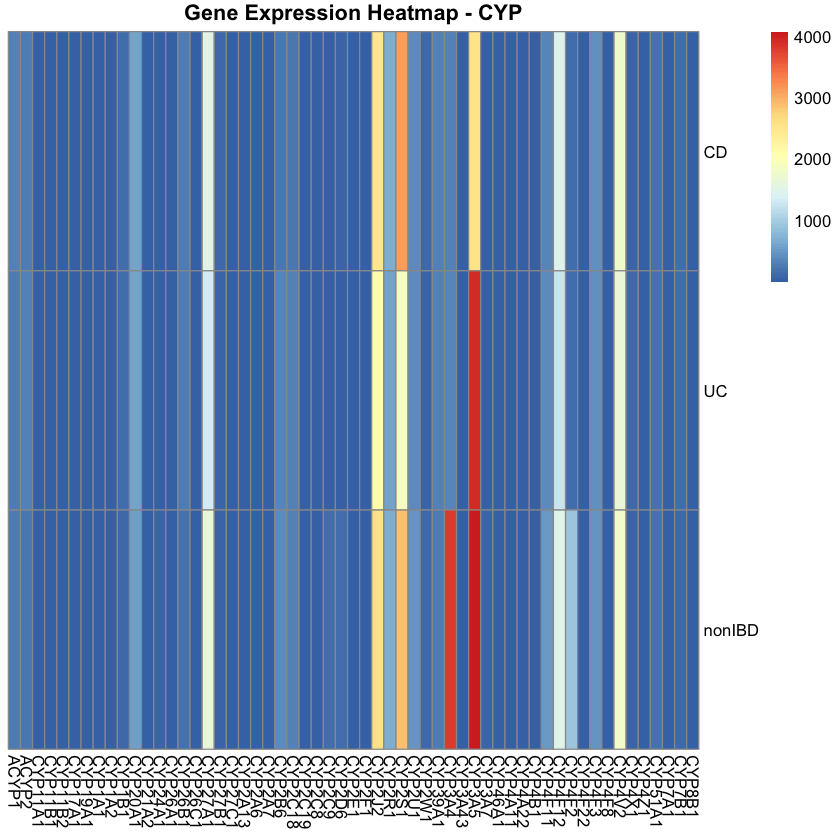

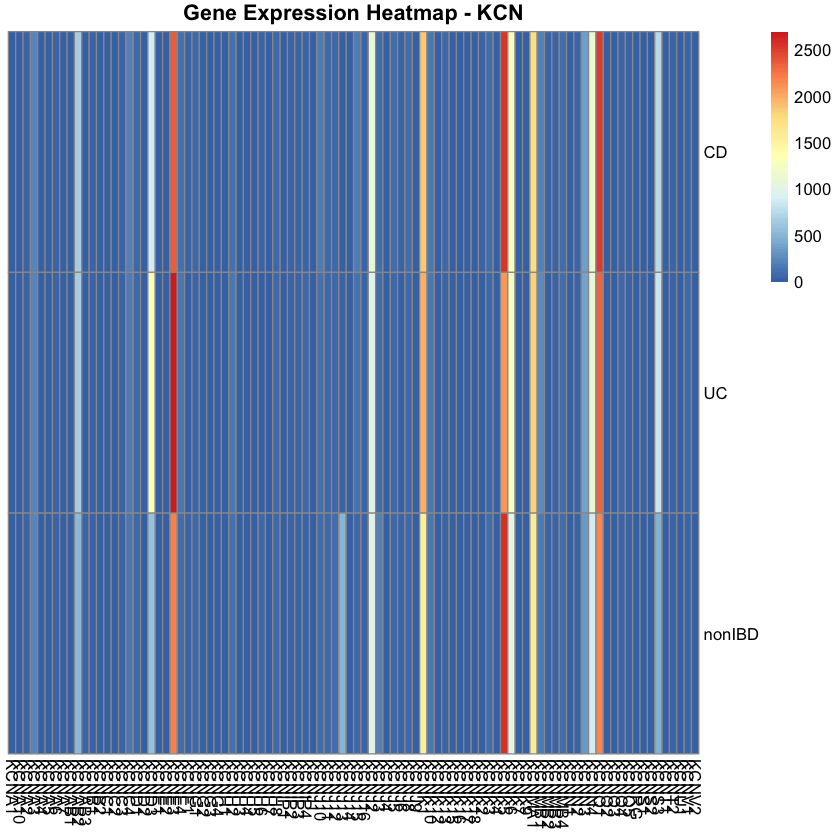

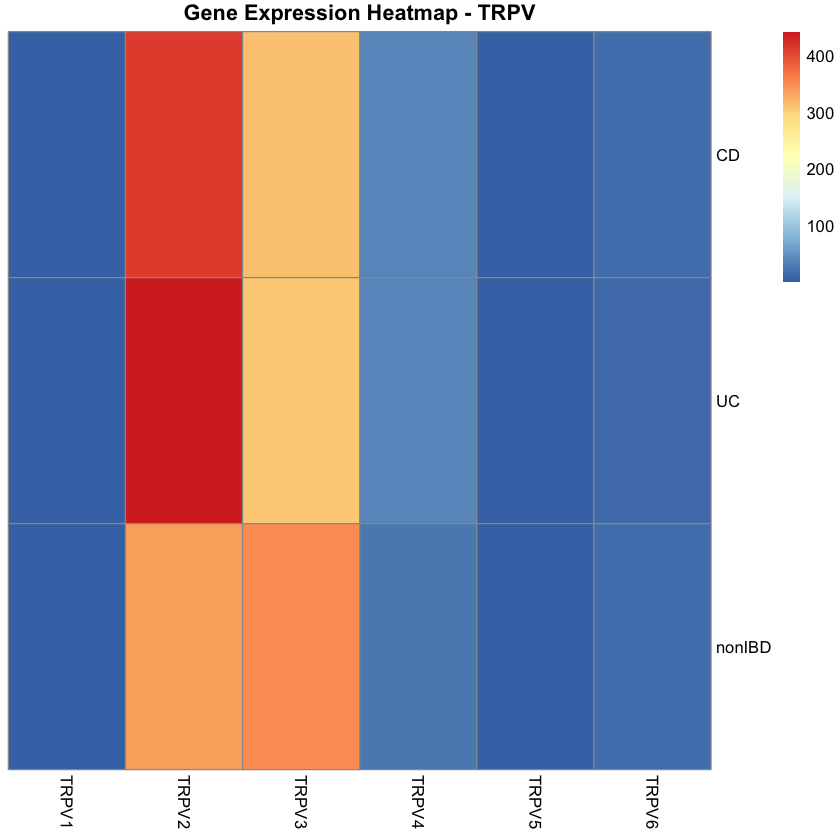

In [143]:
draw_pheatmap(abc.gene_expression_data, "ABC")
draw_pheatmap(slc.gene_expression_data, "SLC")
draw_pheatmap(aqp.gene_expression_data, "AQP")
draw_pheatmap(cyp.gene_expression_data, "CYP")
draw_pheatmap(kcn.gene_expression_data, "KCN")
draw_pheatmap(trpv.gene_expression_data, "TRPV")

In [147]:
selected_slc = c("SLC10A2", "SLC15A1", "SLC16A1", "SLC22A1", "SLC22A2", 
               "SLC22A3", "SLC22A4", "SLC22A5", "SLC22A6", "SLC22A7", 
               "SLC22A8", "SLC28A2", "SLC29A1", "SLC29A2", "SLC51A", 
               "SLC51B", "SLCO2B1")

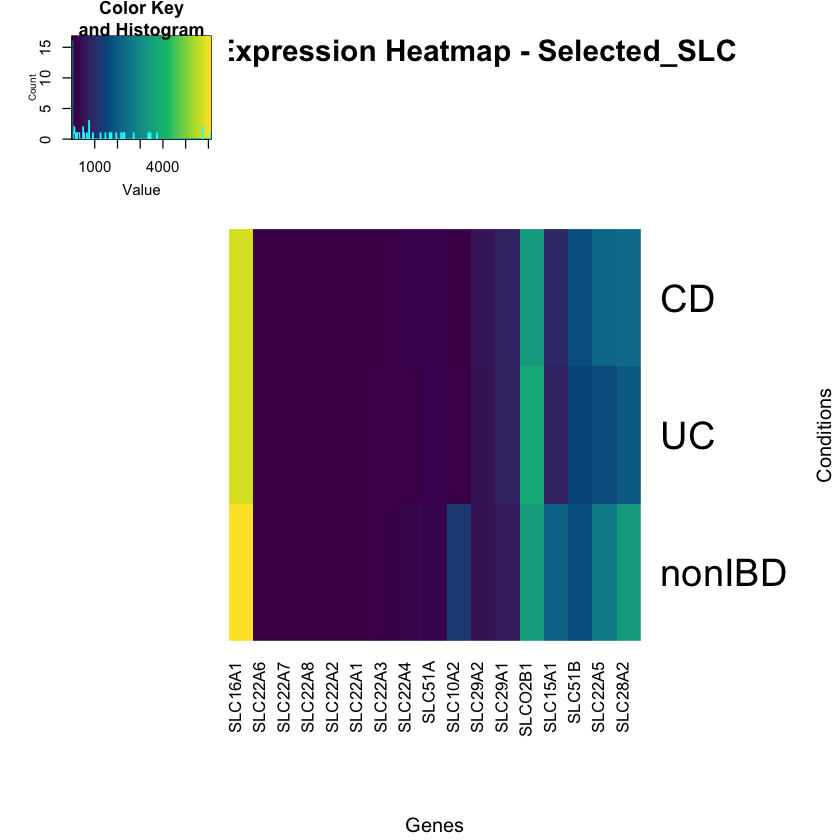

In [148]:
selected_slc.gene_expression_data <- get_gene_expression_data(dx, selected_slc)
draw_heatmap(selected_slc.gene_expression_data, "Selected_SLC")

In [ ]:
abc.gene_expression_data
slc.gene_expression_data
aqp.gene_expression_data
cyp.gene_expression_data
kcn.gene_expression_data
trpv.gene_expression_data
selected_slc.gene_expression_data

In [ ]:
##Do a significance test to get only a few genes for each category
# Perform t-test for each gene

In [195]:
head(gene_expression_data)

,CD,UC,nonIBD
SLC10A2,17.235294,76.681818,1259.8181818
SLC15A1,930.205882,745.181818,2161.5000000
SLC16A1,5748.382353,5755.772727,6118.4090909
SLC22A1,10.352941,6.909091,8.4090909
SLC22A2,1.588235,1.227273,0.8181818
SLC22A3,62.911765,103.454545,111.5000000


In [198]:
head(dx)
colnames(dx)

,CD,UC,nonIBD
A1BG,1.147059e+00,1.545455e+00,1.272727e+00
A1CF,3.044706e+03,2.775545e+03,3.132227e+03
A2M,2.427091e+04,3.001482e+04,2.097550e+04
A2ML1,5.588235e-01,3.636364e-01,5.909091e-01
A3GALT2,5.294118e-01,6.818182e-01,2.727273e-01
A4GALT,1.909118e+02,1.990909e+02,1.518636e+02


[1] "CD"     "UC"     "nonIBD"

In [214]:
df_for_ptest <- data.frame(dx)
head(df_for_ptest)

,CD,UC,nonIBD
,<dbl>,<dbl>,<dbl>
A1BG,1.147059e+00,1.545455e+00,1.272727e+00
A1CF,3.044706e+03,2.775545e+03,3.132227e+03
A2M,2.427091e+04,3.001482e+04,2.097550e+04
A2ML1,5.588235e-01,3.636364e-01,5.909091e-01
A3GALT2,5.294118e-01,6.818182e-01,2.727273e-01
A4GALT,1.909118e+02,1.990909e+02,1.518636e+02


In [216]:
# Perform t-test for each gene for UC patient data
p_value_uc <- data.frame("pvalue" = sapply(rownames(df_for_ptest), function(gene) 
  t.test(df_for_ptest$nonIBD, df_for_ptest$UC)$p.value), row.names = rownames(df_for_ptest))
head(p_value_uc)

,pvalue
,<dbl>
A1BG,0.05209378
A1CF,0.05209378
A2M,0.05209378
A2ML1,0.05209378
A3GALT2,0.05209378
A4GALT,0.05209378


In [218]:
# Apply Bonferroni correction
num_tests <- nrow(p_value_uc)  # Number of tests (number of genes)
num_tests

[1] 18315

In [223]:
# # Apply Bonferroni correction to the p-values
p_values_corrected <- p.adjust(p_value_uc$pvalue, method = "bonferroni", n = num_tests)

# Add the corrected p-values to the dataframe
p_value_uc$corrected_p_value <- p_values_corrected
head(p_value_uc)

,pvalue,corrected_p_value
,<dbl>,<dbl>
A1BG,0.05209378,1
A1CF,0.05209378,1
A2M,0.05209378,1
A2ML1,0.05209378,1
A3GALT2,0.05209378,1
A4GALT,0.05209378,1


In [224]:
# Identify significant genes based on corrected p-values (e.g., corrected p < 0.05)
significant_genes_uc <- rownames(p_value_uc)[p_value_uc$corrected_p_value < 0.05]
significant_genes_uc

character(0)

In [229]:
# Perform t-test for each gene for CD patient data
p_value_cd <- data.frame("pvalue" = sapply(rownames(df_for_ptest), function(gene) 
  t.test(df_for_ptest$nonIBD, df_for_ptest$CD, paired = T)$p.value), row.names = rownames(df_for_ptest))

# Apply Bonferroni correction
num_tests <- nrow(p_value_cd)  # Number of tests (number of genes)

# Apply Bonferroni correction to the p-values
p_values_corrected <- p.adjust(p_value_cd$pvalue, method = "bonferroni", n = num_tests)

# Add the corrected p-values to the dataframe
p_value_cd$corrected_p_value <- p_values_corrected

head(p_value_cd)

,pvalue,corrected_p_value
,<dbl>,<dbl>
A1BG,7.958763e-66,1.457647e-61
A1CF,7.958763e-66,1.457647e-61
A2M,7.958763e-66,1.457647e-61
A2ML1,7.958763e-66,1.457647e-61
A3GALT2,7.958763e-66,1.457647e-61
A4GALT,7.958763e-66,1.457647e-61


In [230]:
# Identify significant genes based on corrected p-values (e.g., corrected p < 0.05)
significant_genes_cd <- rownames(p_value_cd)[p_value_cd$corrected_p_value < 0.05]

In [231]:
significant_genes_cd

[1] "A1BG"            "A1CF"            "A2M"             "A2ML1"          
    [5] "A3GALT2"         "A4GALT"          "A4GNT"           "AAAS"           
    [9] "AACS"            "AADAC"           "AADACL2"         "AADACL3"        
   [13] "AADACL4"         "AADAT"           "AAGAB"           "AAK1"           
   [17] "AAMDC"           "AAMP"            "AANAT"           "AAR2"           
   [21] "AARD"            "AARS"            "AARS2"           "AARSD1"         
   [25] "AASDH"           "AASDHPPT"        "AASS"            "AATF"           
   [29] "AATK"            "ABAT"            "ABCA1"           "ABCA10"         
   [33] "ABCA12"          "ABCA13"          "ABCA2"           "ABCA3"          
   [37] "ABCA4"           "ABCA5"           "ABCA6"           "ABCA7"          
   [41] "ABCA8"           "ABCA9"           "ABCB1"           "ABCB10"         
   [45] "ABCB11"          "ABCB4"           "ABCB5"           "ABCB6"          
   [49] "ABCB7"           "ABCB8"           "ABCB9"           "ABCC1"          
   [53] "ABCC10"          "ABCC11"          "ABCC12"          "ABCC2"          
   [57] "ABCC3"           "ABCC4"           "ABCC5"           "ABCC6"          
   [61] "ABCC8"           "ABCC9"           "ABCD1"           "ABCD2"          
   [65] "ABCD3"           "ABCD4"           "ABCE1"           "ABCF1"          
   [69] "ABCF2"           "ABCF3"           "ABCG1"           "ABCG2"          
   [73] "ABCG4"           "ABCG5"           "ABCG8"           "ABHD1"          
   [77] "ABHD10"          "ABHD11"          "ABHD12"          "ABHD12B"        
   [81] "ABHD13"          "ABHD14A"         "ABHD14A-ACY1"    "ABHD14B"        
   [85] "ABHD15"          "ABHD16A"         "ABHD16B"         "ABHD17A"        
   [89] "ABHD17B"         "ABHD17C"         "ABHD2"           "ABHD3"          
   [93] "ABHD4"           "ABHD5"           "ABHD6"           "ABHD8"          
   [97] "ABI1"            "ABI2"            "ABI3"            "ABI3BP"         
  [101] "ABL1"            "ABL2"            "ABLIM1"          "ABLIM2"         
  [105] "ABLIM3"          "ABO"             "ABR"             "ABRA"           
  [109] "ABRACL"          "ABT1"            "ABTB1"           "ABTB2"          
  [113] "ACAA1"           "ACAA2"           "ACACA"           "ACACB"          
  [117] "ACAD10"          "ACAD11"          "ACAD8"           "ACAD9"          
  [121] "ACADL"           "ACADM"           "ACADS"           "ACADSB"         
  [125] "ACADVL"          "ACAN"            "ACAP1"           "ACAP2"          
  [129] "ACAP3"           "ACAT1"           "ACAT2"           "ACBD3"          
  [133] "ACBD4"           "ACBD5"           "ACBD6"           "ACBD7"          
  [137] "ACCS"            "ACCSL"           "ACD"             "ACE"            
  [141] "ACE2"            "ACER1"           "ACER2"           "ACER3"          
  [145] "ACHE"            "ACIN1"           "ACKR2"           "ACKR3"          
  [149] "ACKR4"           "ACLY"            "ACMSD"           "ACO1"           
  [153] "ACO2"            "ACOT1"           "ACOT11"          "ACOT12"         
  [157] "ACOT13"          "ACOT2"           "ACOT4"           "ACOT6"          
  [161] "ACOT7"           "ACOT8"           "ACOT9"           "ACOX1"          
  [165] "ACOX2"           "ACOX3"           "ACOXL"           "ACP1"           
  [169] "ACP2"            "ACP5"            "ACP6"            "ACPP"           
  [173] "ACR"             "ACRBP"           "ACRV1"           "ACSBG1"         
  [177] "ACSBG2"          "ACSF2"           "ACSF3"           "ACSL1"          
  [181] "ACSL3"           "ACSL4"           "ACSL5"           "ACSL6"          
  [185] "ACSM1"           "ACSM2A"          "ACSM2B"          "ACSM3"          
  [189] "ACSM4"           "ACSM5"           "ACSS1"           "ACSS2"          
  [193] "ACSS3"           "ACTA1"           "ACTA2"           "ACTB"           
  [197] "ACTBL2"          "ACTC1"           "ACTG1"           "ACTG2"          
  [2

In [232]:
significant_genes_uc

character(0)

In [ ]:
##Get genes shared between the two conditions
gene.list <- intersect(significant_genes_cd, significant_genes_uc)
gene.list